In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data_path = "/content/p.csv"
df = pd.read_csv(data_path)

In [13]:
print("\nData Types:\n", df.dtypes)


Data Types:
 timestamp                               object
mode                                    object
node_cpu_seconds_total                 float64
node_filesystem_avail_bytes              int64
node_filesystem_size_bytes               int64
node_disk_read_bytes_total               int64
node_disk_written_bytes_total            int64
node_network_receive_bytes_total         int64
node_network_receive_drop_total          int64
node_network_transmit_packets_total      int64
node_vmstat_pgmajfault                   int64
node_memory_MemAvailable_bytes           int64
node_memory_MemTotal_bytes               int64
node_forks_total                         int64
node_intr_total                          int64
node_load1                             float64
node_load5                             float64
node_load15                            float64
node_sockstat_TCP_alloc                  int64
node_sockstat_TCP_mem                    int64
node_sockstat_TCP_mem_bytes              int64

In [14]:
print("\nClass Distribution:\n", df['mode'].value_counts())


Class Distribution:
 mode
normal_traffic    9479
high_traffic      9414
udp_flood         7215
http_flood        6699
icmp_flood        4632
tcp_flood         2991
Name: count, dtype: int64


In [3]:
# Feature selection (excluding timestamp and non-numeric columns)
features = [col for col in df.columns if col not in ['timestamp', 'mode']]
X = df[features].values
y = df['mode'].values

In [4]:
# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
# Reshape for LSTM/GRU (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Function to create LSTM model
def create_lstm_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(32, return_sequences=False),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(len(set(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# Function to create GRU model
def create_gru_model():
    model = Sequential([
        GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        GRU(32, return_sequences=False),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(len(set(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Function to create LSTM + GRU hybrid model
def create_lstm_gru_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        GRU(32, return_sequences=False),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(len(set(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# Train and evaluate models
models = {'LSTM': create_lstm_model(), 'GRU': create_gru_model(), 'LSTM+GRU': create_lstm_gru_model()}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model...
Epoch 1/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.2653 - loss: 1.6969 - val_accuracy: 0.4002 - val_loss: 1.4871
Epoch 2/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3888 - loss: 1.4806 - val_accuracy: 0.4911 - val_loss: 1.2889
Epoch 3/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4582 - loss: 1.3184 - val_accuracy: 0.5043 - val_loss: 1.1537
Epoch 4/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5046 - loss: 1.1747 - val_accuracy: 0.5994 - val_loss: 0.9606
Epoch 5/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5628 - loss: 1.0416 - val_accuracy: 0.6457 - val_loss: 0.8551
Epoch 6/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5978 - loss: 0.9431 - val_accuracy: 0.6917 - val_loss: 0.7584
Epoch 7/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6300 - loss: 0.8571 - val_accuracy: 0.7015 - val_loss: 0.7068
Epoch 8/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - 

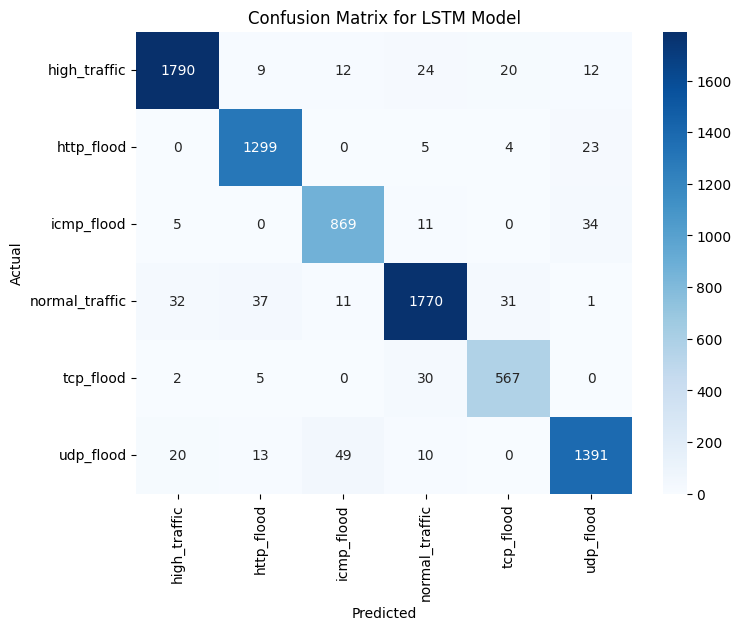

Training GRU model...
Epoch 1/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2741 - loss: 1.6810 - val_accuracy: 0.3863 - val_loss: 1.4920
Epoch 2/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3922 - loss: 1.4938 - val_accuracy: 0.4450 - val_loss: 1.3169
Epoch 3/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4429 - loss: 1.3504 - val_accuracy: 0.5056 - val_loss: 1.1883
Epoch 4/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4818 - loss: 1.2289 - val_accuracy: 0.5660 - val_loss: 1.0568
Epoch 5/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5321 - loss: 1.0978 - val_accuracy: 0.6177 - val_loss: 0.9147
Epoch 6/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5752 - loss: 0.9866 - val_accuracy: 0.6813 - val_loss: 0.8027
Epoch 7/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6188 - loss: 0.8961 - val_accuracy: 0.7182 - val_loss: 0.7363
Epoch 8/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - 

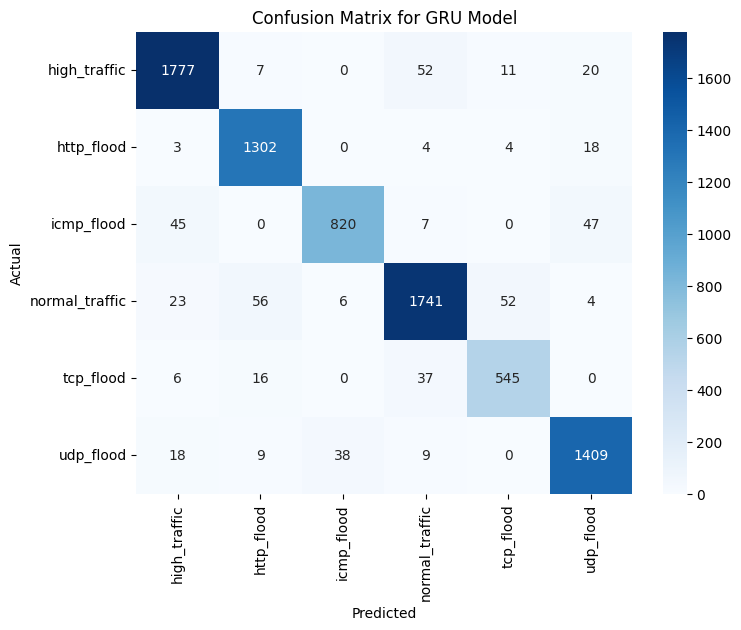

Training LSTM+GRU model...
Epoch 1/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2538 - loss: 1.6993 - val_accuracy: 0.3624 - val_loss: 1.5505
Epoch 2/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3722 - loss: 1.5346 - val_accuracy: 0.4441 - val_loss: 1.3428
Epoch 3/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4478 - loss: 1.3594 - val_accuracy: 0.5521 - val_loss: 1.1739
Epoch 4/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5069 - loss: 1.2281 - val_accuracy: 0.5982 - val_loss: 1.0389
Epoch 5/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5390 - loss: 1.1142 - val_accuracy: 0.6255 - val_loss: 0.9303
Epoch 6/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5676 - loss: 1.0263 - val_accuracy: 0.6720 - val_loss: 0.8276
Epoch 7/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6031 - loss: 0.9386 - val_accuracy: 0.6731 - val_loss: 0.7850
Epoch 8/150
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step

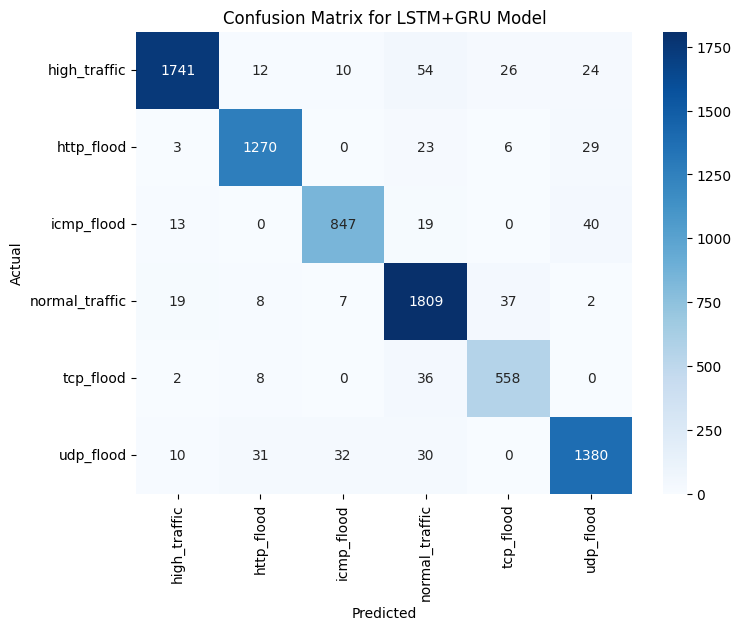

In [12]:
for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model Accuracy: {accuracy:.4f}")
    print(f"{name} Model Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name} Model')
    plt.show()
